<a href="https://colab.research.google.com/github/JHermosillaD/Microalgae/blob/master/Chlorococum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de la microalga Chlorococum sp

---

Después de realizar el tracking con `Fiji` y extraer los datos, se calculó el desplazamiento cuadrático medio (MSD) apartir de las posiciónes obtenidas, según:
\begin{align}
\langle(\Delta r)^2\rangle = \frac{\sum_{i}^{N}\sqrt{(x_i-x_0)^2+(y_i-y_0)^2}}{N}
\end{align}

El comportaiento difusivo anómalo está dado por una relación no lineal entre el MSD y el tiempo. Donde el coeficiente difusión se puede hallar aplicando logaritmos a dicha relación.
\begin{align}
\lim_{t \to \infty} \langle(\Delta r)^2\rangle &\propto t^\alpha\\
y &= \beta t^\alpha \\
Ln(y) &= \alpha Ln(t) + Ln(\beta)
\end{align}
<figure>
<center>
<img src='https://raw.githubusercontent.com/JHermosillaD/Microalgae/master/Case%206%20-%202750/spots_index.jpg' />
<figcaption>Captura del stack al tiempo cero</figcaption></center>
</figure>


---



### Paquetes usados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Tomando datos

In [2]:
frame_spot2 = pd.read_csv('https://raw.githubusercontent.com/JHermosillaD/Microalgae/master/Case%206%20-%202750/data/spot2.csv')
frame_spot3 = pd.read_csv('https://raw.githubusercontent.com/JHermosillaD/Microalgae/master/Case%206%20-%202750/data/spot3.csv')
frame_spot4 = pd.read_csv('https://raw.githubusercontent.com/JHermosillaD/Microalgae/master/Case%206%20-%202750/data/spot4.csv')
frame_spot11 = pd.read_csv('https://raw.githubusercontent.com/JHermosillaD/Microalgae/master/Case%206%20-%202750/data/spot11.csv')

### Conviertiendo en arrays las columnas de interés

In [3]:
x2 = np.array([frame_spot2["POSITION_X"]]).reshape(-1, 1)
y2 = np.array([frame_spot2["POSITION_Y"]]).reshape(-1, 1)
log_t2 = np.log(frame_spot2['POSITION_T'])

x3 = np.array([frame_spot3["POSITION_X"]]).reshape(-1, 1)
y3 = np.array([frame_spot3["POSITION_Y"]]).reshape(-1, 1)
log_t3 = np.log(frame_spot2['POSITION_T'])

x4 = np.array([frame_spot4["POSITION_X"]]).reshape(-1, 1)
y4 = np.array([frame_spot4["POSITION_Y"]]).reshape(-1, 1)
log_t4 = np.log(frame_spot2['POSITION_T'])

x11 = np.array([frame_spot11["POSITION_X"]]).reshape(-1, 1)
y11 = np.array([frame_spot11["POSITION_Y"]]).reshape(-1, 1)
log_t11 = np.log(frame_spot2['POSITION_T'])

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


### Generando una función para aplicar una regresión lineal y graficar

In [4]:
def MSD_Linear_regresion(x,y,log_t,z):
  N = len(x)-1
  MSD = np.zeros((N, 0))
  accumulated = 0
  i = 1

  while i <= N:
    difference = np.sqrt((x[i] - x[0])**2 + (y[i] - y[0])**2 )
    accumulated = accumulated + np.sum(difference)/N
    MSD = np.append(MSD, accumulated)
    i += 1

  MSD_log = np.log(MSD)
  x_train = np.array(log_t[1:]).reshape(-1, 1)
  y_train = np.array(MSD_log).reshape(-1, 1)

  Lr = LinearRegression()
  fit = Lr.fit(x_train, y_train)
  y_pred = Lr.predict(x_train)

  slope = fit.coef_[0][0]
  b = fit.intercept_[0]
  MSE = mean_squared_error(y_train, y_pred)
  RR = r2_score(y_train, y_pred)
  print(z,'->','slope: %.2f' % slope,'b: %.2f' % b, 'MSE: %.2f' % MSE, 'R^2 %.2f' % RR)
  
  g = sns.regplot(x=x_train,y=y_train, label=z)
  g.legend(loc="best")
  g.set(xlim=(0,8) , ylim=(-10,4))
  g.figure.set_size_inches(8, 14)          
  g.set_title(" Diffusion equation T = 1074 seg")
  g.set_ylabel("Ln(MSD)")
  g.set_xlabel("Ln(t)")


### Resultados
---



ID70 -> slope: 1.51 b: -8.42 MSE: 0.04 R^2 0.98
ID71 -> slope: 1.49 b: -7.18 MSE: 0.09 R^2 0.96
ID72 -> slope: 1.49 b: -7.48 MSE: 0.05 R^2 0.98
ID79 -> slope: 1.27 b: -7.66 MSE: 0.02 R^2 0.99


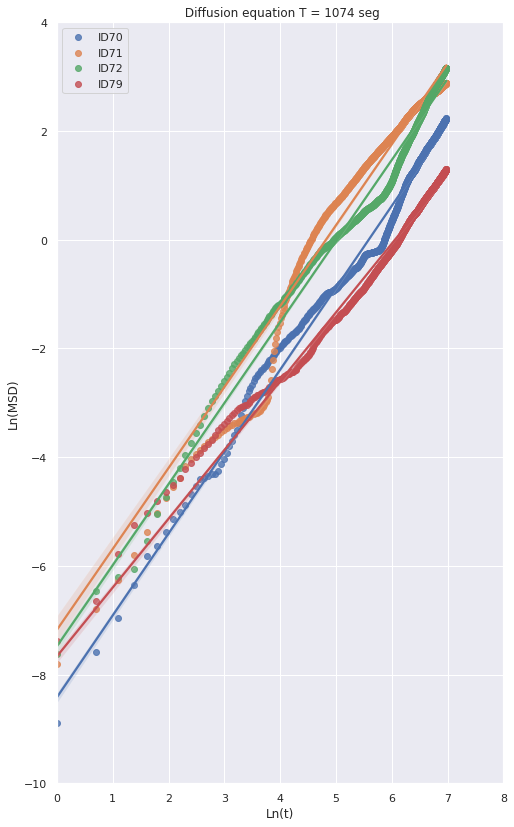

In [5]:
MSD_Linear_regresion(x2,y2,log_t2,z='ID70')
MSD_Linear_regresion(x3,y3,log_t3,z='ID71')
MSD_Linear_regresion(x4,y4,log_t4,z='ID72')
MSD_Linear_regresion(x11,y11,log_t11,z='ID79')